
## Objetivo:
Com base na situação atual, deseja-se empreender uma análise acerca de dois produtos de relevância para o Brasil, a soja, que desempenha um papel significativo para o país, e o gás russo, cujo impacto é de alcance global. Nesse contexto, almeja-se explorar a correlação entre tais produtos e identificar os potenciais impactos que podem se manifestar no futuro.
 *RODAR O NOTEBOOK NO COLAB, ELE SÓ FUNCIONA NELE.

 Para realizar a análise, iremos criar uma API e plotar o gráfico, o produto, a moeda e o valor.


A soja e o gás russo desempenham papéis fundamentais para o Brasil e suas correlações possuem grande importância econômica.

A soja é uma das principais commodities agrícolas do país, sendo o Brasil o maior produtor e exportador mundial desse grão. Sua produção impulsiona o setor agropecuário, contribui para a geração de empregos e representa uma fatia significativa das exportações brasileiras. Além disso, a soja possui diversas aplicações, tanto para consumo humano como animal, e é matéria-prima essencial para a indústria de biocombustíveis.

O gás russo, por sua vez, é uma fonte de energia crucial para muitos países ao redor do mundo, inclusive para o Brasil. A Rússia é um dos principais produtores e exportadores de gás natural, suprindo uma demanda global crescente. O gás russo é utilizado em diversos setores, desde a geração de energia elétrica até a indústria química, sendo uma alternativa energética importante para o Brasil, que busca diversificar suas fontes de energia

In [19]:
!pip install Dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install jupyter-dash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importando as bibliotecas

In [21]:
#Importar biblioteca para manipulação de tabelas
import pandas as pd
import numpy as np

#Bibliotecas para o web scrapping
import requests
from bs4 import BeautifulSoup
import re

#Bibliotecas para o API utilizando Pyplot
from dash import Dash
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output
from dash import no_update
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output, State
JupyterDash.infer_jupyter_proxy_config()

##Realização do web scrapping dos valores da soja com BeatifulSoup


O BeautifulSoup é uma biblioteca Python que facilita a extração de dados de páginas web através de web scraping. Ele permite analisar a estrutura HTML de um site, encontrar elementos desejados e extrair informações relevantes de forma automatizada. Com suas funcionalidades, é possível coletar dados para análises, pesquisas e automação de tarefas.






In [22]:
url_fonte = 'https://www.indexmundi.com/pt/pre%C3%A7os-de-mercado/?mercadoria=soja&meses=240&moeda=brl' # Link da pagina
con = requests.get(url_fonte) #Realizando request
html_page = con.text
soup = BeautifulSoup(con.text, 'html.parser')
lista = []
for link in soup.find_all('td'):
  text = str(link.text)
  regex_text = re.sub('\W+', ' ', text).strip()
  lista.append(regex_text) #Append para a lista

##Tratamento dos dados

É preciso garantir que os dados estejam prontos para serem explorados e utilizados na análise estatística.

Para isso, é preciso realizar o tratamento de caracteres especiais corretamente, evitando erros ou distorções nos resultados obtidos. Isso pode envolver a remoção, substituição ou codificação adequada dos caracteres especiais, de acordo com as necessidades do projeto.

In [23]:
del lista[0]#Retirado o primeiro item da lista
data = []
for i in range(0, len(lista), 3):#A cada tres passos pegamos a data
  a = lista[i]
  data.append(a)
soja = []
for i in range(1, len(lista), 3):#A cada tres passos pegamos o preço
  a = lista[i]
  soja.append(a)
soja2 = pd.DataFrame({'preço': soja})
#Tratando o dataframe
soja2['cent']=soja2['preço'].str.rsplit(' ',1).str[-1]
soja2['preço'] = soja2['preço'].str.rsplit(' ',1).str[0]
soja2['preço'] = soja2['preço'].str.replace(' ', '')
soja2['preço'] = soja2['preço'] + '.' + soja2['cent']
soja2['data'] = data
soja2['ano']=soja2['data'].str.rsplit(' ',1).str[-1]
soja2['mes']=soja2['data'].str.rsplit(' ').str[-2]

<ipython-input-23-a2fcdd1242ce>:12: FutureWarning:

In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.

<ipython-input-23-a2fcdd1242ce>:13: FutureWarning:

In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.

<ipython-input-23-a2fcdd1242ce>:17: FutureWarning:

In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.



##Criação da função para transformar os meses em valores numéricos

In [24]:
#Criando função para transformar os meses em valores numericos
def new_column1(row):
  if row['mes'] =='jan':
    return '01'
  elif row['mes'] =='fev':
    return '02'
  elif row['mes'] =='mar':
    return '03'
  elif row['mes'] =='abr':
    return '04'
  elif row['mes'] =='mai':
    return '05'
  elif row['mes'] =='jun':
    return '06'
  elif row['mes'] =='jul':
    return '07'
  elif row['mes'] =='ago':
    return '08'
  elif row['mes'] =='set':
    return '09'
  elif row['mes'] =='out':
    return '10'
  elif row['mes'] =='nov':
    return '11'
  elif row['mes'] =='dez':
    return '12'
soja2['mes'] = soja2.apply(new_column1, axis=1)

In [25]:
soja2['data'] = soja2['ano'] +  '-' + soja2['mes']
soja2 = soja2[['data', 'preço']]
soja2['data'] = pd.to_datetime(soja2['data']) #Transformando string em date
soja2['preço'] = soja2['preço'].astype(float) #Transfomando o preço em float

##Verficando o comportamento da soja

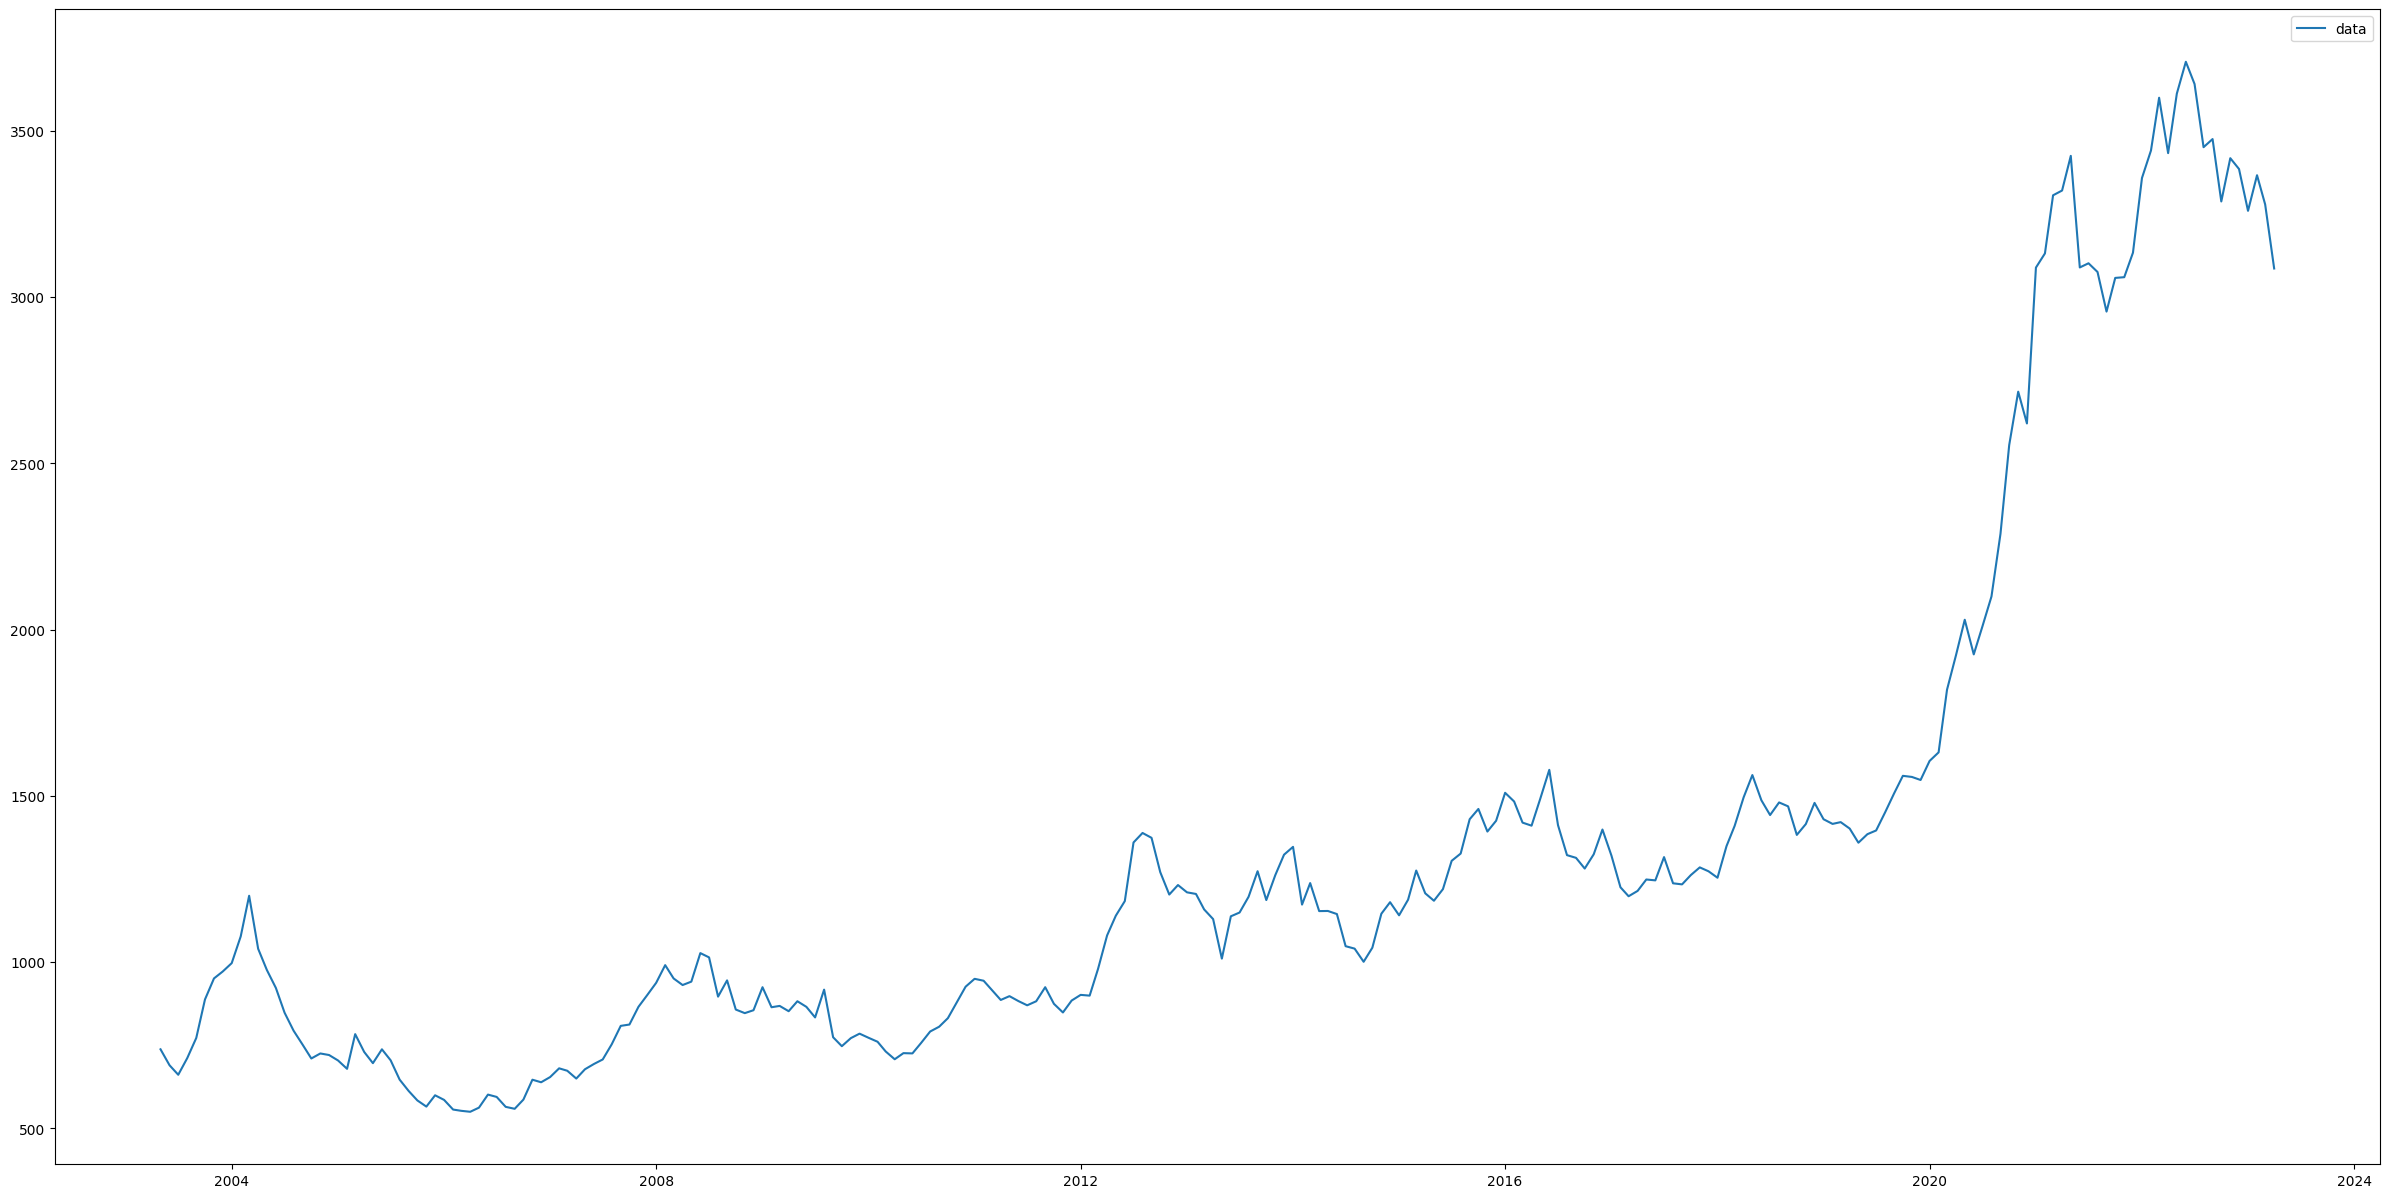

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
x = soja2['data']
y = soja2['preço']
plt.plot(x, y)
plt.legend(soja2.columns)
plt.show()

In [27]:
url_fonte = 'https://www.indexmundi.com/pt/pre%C3%A7os-de-mercado/?mercadoria=g%c3%a1s-natural-russo&meses=240&moeda=brl' # Link da pagina
con = requests.get(url_fonte) #Realizando request
html_page = con.text
soup = BeautifulSoup(con.text, 'html.parser')
lista = []
for link in soup.find_all('td'):
  text = str(link.text)
  regex_text = re.sub('\W+', ' ', text).strip()
  lista.append(regex_text) #Append para a lista

In [28]:
del lista[0]
data = []
for i in range(0, len(lista), 3):# A cada três passos pegamos a data
  a = lista[i]
  data.append(a)

gas = []
for i in range(1, len(lista), 3):# A cada três passos pegamos o preço
  a = lista[i]
  gas.append(a)
#Tratamento do dataframe
gas= pd.DataFrame({'preço': gas})
gas['cent']=gas['preço'].str.rsplit(' ',1).str[-1]
gas['preço'] = gas['preço'].str.rsplit(' ',1).str[0]
gas['preço'] = gas['preço'].str.replace(' ', '')
gas['preço'] = gas['preço'] + '.' + gas['cent']
gas['data'] = data
gas['ano']=gas['data'].str.rsplit(' ',1).str[-1]
gas['mes']=gas['data'].str.rsplit(' ').str[-2]
gas['mes'] = gas.apply(new_column1, axis=1)
gas['data'] = gas['ano'] +  '-' + gas['mes']
gas = gas[['data', 'preço']]
gas['data'] = pd.to_datetime(gas['data'])
gas['preço'] = gas['preço'].astype(float)

<ipython-input-28-2d8e0232908c>:13: FutureWarning:

In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.

<ipython-input-28-2d8e0232908c>:14: FutureWarning:

In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.

<ipython-input-28-2d8e0232908c>:18: FutureWarning:

In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.



In [29]:
gas

,data,preço
0,2003-05-01,11.92
1,2003-06-01,11.69
2,2003-07-01,11.61
3,2003-08-01,11.95
4,2003-09-01,11.61
...,...,...
235,2022-12-01,188.99
236,2023-01-01,104.99
237,2023-02-01,85.53
238,2023-03-01,72.07


##Verifcando o gráfico do gás russo

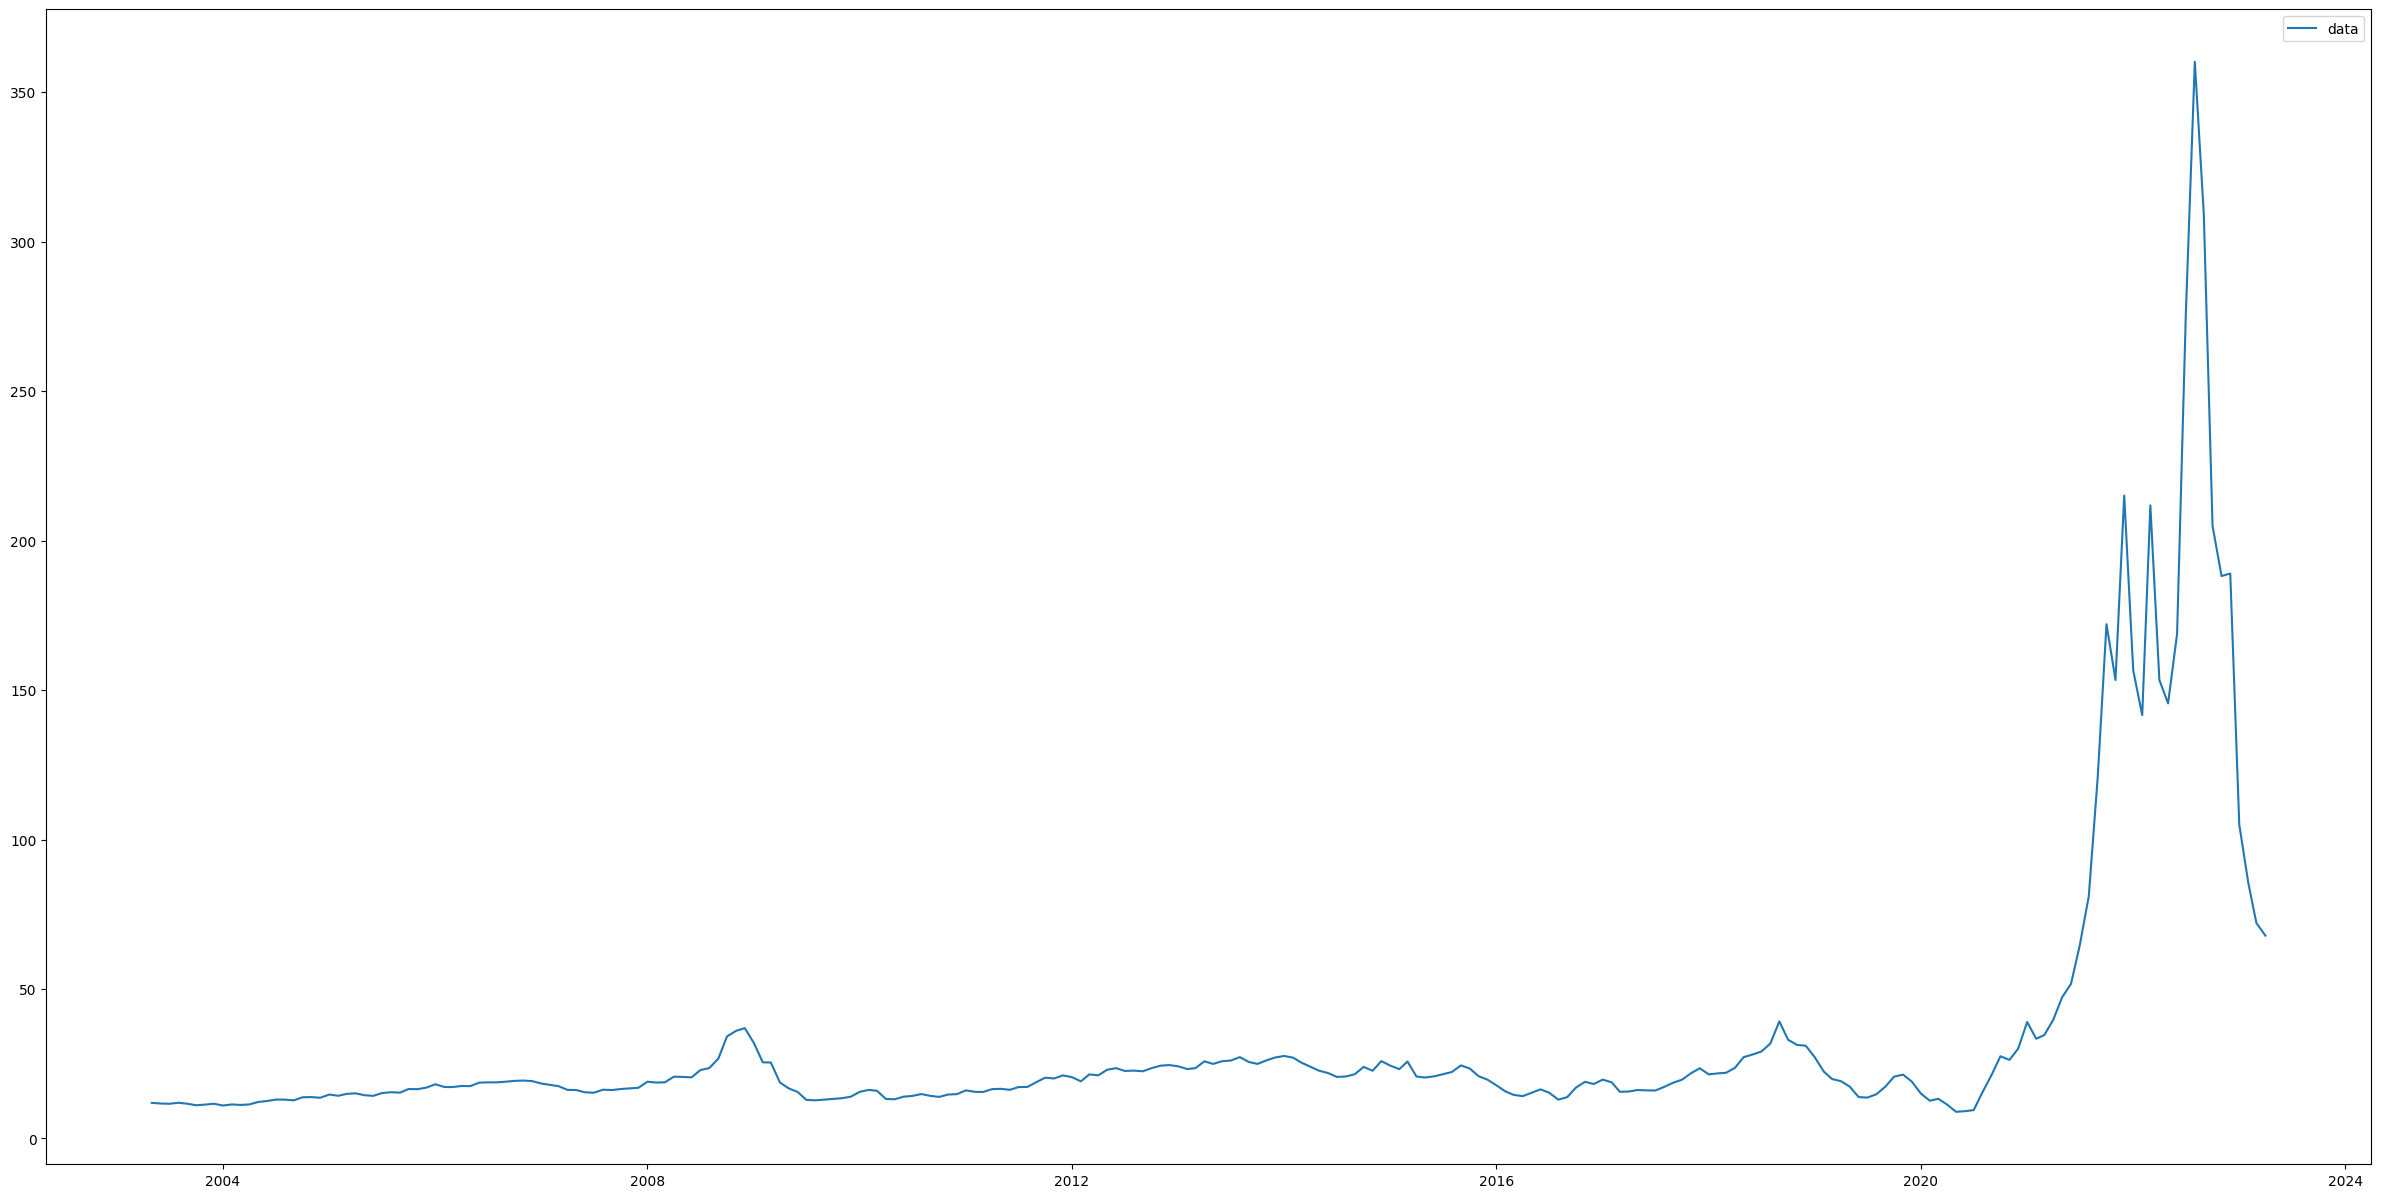

In [30]:
plt.figure(figsize=(30, 15))
x = gas['data']
y = gas['preço']
plt.plot(x, y)
plt.legend(gas.columns)
plt.show()

## A analise será realizada com os dados de 2021




In [31]:
gas = gas[gas['data'].dt.year == 2021]
soja = soja2[soja2['data'].dt.year == 2021]


##Pegando o valor do dólar para teste

In [32]:
url_fonte = 'https://br.investing.com/currencies/usd-brl' # Link da pagina
con = requests.get(url_fonte) #Realizando request
html_page = con.text
soup = BeautifulSoup(con.text, 'html.parser')
for link in soup.find_all('span',{'class': 'text-2xl'}):
  text = str(link.text)
text

'-5,84%'

##Para concatenar os dataframes, é necessário criar uma coluna com o tipo do produto

In [33]:
lista= []
for i in range(gas.shape[0]):
  lista.append('gas')
gas['produto'] = lista

<ipython-input-33-cb72ae4cb5f7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
lista= []
for i in range(soja.shape[0]):
  lista.append('soja')
soja['produto'] = lista

<ipython-input-34-4d2dce6e9137>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df = pd.concat([soja, gas])
df

,data,preço,produto
212,2021-01-01,3089.16,soja
213,2021-02-01,3131.80,soja
214,2021-03-01,3306.65,soja
215,2021-04-01,3320.96,soja
216,2021-05-01,3425.21,soja
217,2021-06-01,3089.59,soja
218,2021-07-01,3102.16,soja
219,2021-08-01,3075.97,soja
220,2021-09-01,2956.83,soja
221,2021-10-01,3058.15,soja


##Realização do API

In [36]:

#Pegando o valor do Dolar
url_fonte = 'https://br.investing.com/currencies/usd-brl' # Link da pagina
con = requests.get(url_fonte) #Realizando request
html_page = con.text
soup = BeautifulSoup(con.text, 'html.parser')
for link in soup.find_all('span',{'class': 'text-2xl'}):
  text = str(link.text)
text

#Importando o template
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

#Criação do layout
app.layout = html.Div([
    html.H6("Escolha o tipo de dado" , style={'fontSize':20} ),#Criação do botão para o tipo do produto
    dcc.Dropdown(id='my-dropdown2', multi=False,
                options=[{'label': x, 'value': x} for x in sorted(df['produto'].unique())],
                value='soja'),
    html.Br(),
    dcc.Graph(id='graph-output1', figure= {}), #Criação do gráfico
    html.Br(),
    html.H6(f'valor do dólar {text}' , style={'fontSize':20}),#Informação do texto



])

#Criação do callback da tabela

@app.callback(
    Output(component_id='graph-output1', component_property='figure'),
    Input(component_id='my-dropdown2', component_property='value'),
)
def update_my_graph(tipo):
    dff = df.copy()
    dff2 = dff[(dff["produto"] == tipo)]
    fig = px.line(dff2, x='data', y='preço', title="Gráfico de linha",
            width=800, height=400)
    return fig


app.run_server()

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



Dash app running on:


<IPython.core.display.Javascript object>